In [64]:
#Initializing
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
import math

#Loading Data
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/heart.csv')

# Variables
- age
- trestbps - Resting blood pressure
- chol - Serum cholestoral in mg/dl
- thalach - Maximum heart rate achieved


Coefficients: 
 [[ 0.08485324  0.03291974 -1.09099419]]

Intercept: 
 [189.6845719]

R-squared:
0.16862175072703345


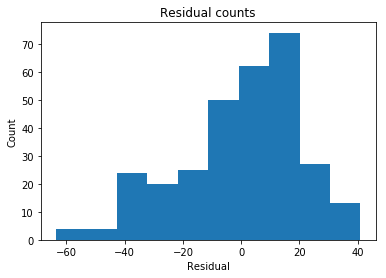

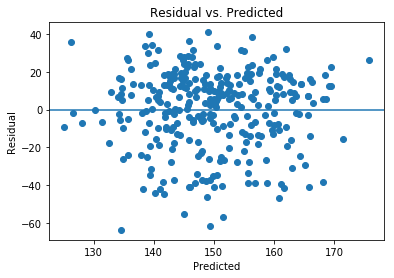

In [65]:
#OLS model

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['thalach'].values.reshape(-1, 1)
X = df[['trestbps','chol','age']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['thalach']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#Residual Plot
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

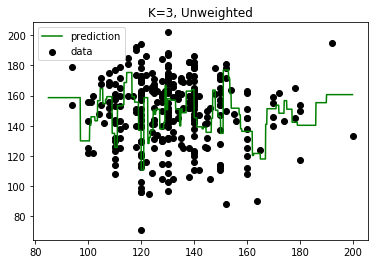

In [66]:
# KNN Model - trestbps - Resting blood pressure
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
Y = df['thalach'].values.reshape(-1, 1)
X = df[['trestbps']]
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(85, 200, .1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=3, Unweighted')
plt.show()

score_rbp = cross_val_score(knn, X, Y, cv=5)

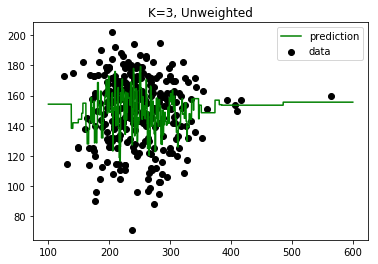

In [67]:
# KNN Model - chol - Serum cholestoral in mg/dl
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
Y = df['thalach'].values.reshape(-1, 1)
X = df[['chol']]
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(100, 600, .1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=3, Unweighted')
plt.show()

score_chol = cross_val_score(knn, X, Y, cv=5)

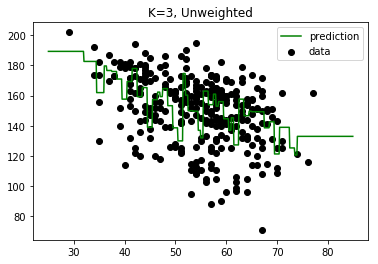

In [68]:
# KNN Model - age
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
Y = df['thalach'].values.reshape(-1, 1)
X = df[['age']]
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(25, 85, .1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=3, Unweighted')
plt.show()

score_age = cross_val_score(knn, X, Y, cv=5)

In [69]:
print("Unweighted Accuracy - resting blood pressure: %0.2f (+/- %0.2f)" % (score_rbp.mean(), score_rbp.std() * 2))
print("Unweighted Accuracy - cholestoral: %0.2f (+/- %0.2f)" % (score_chol.mean(), score_chol.std() * 2))
print("Unweighted Accuracy - age: %0.2f (+/- %0.2f)" % (score_age.mean(), score_age.std() * 2))


Unweighted Accuracy - resting blood pressure: -0.58 (+/- 0.56)
Unweighted Accuracy - cholestoral: -0.75 (+/- 0.48)
Unweighted Accuracy - age: -0.45 (+/- 0.34)


In this scenario the OLS model does a better job in predicting the maximum heart rate achieved by patients with a r-squared value of 0.17. The KNN models does a really terrible job at modeling the max heart rate level with negative r-squared values for each feature. 